In [1]:
from sklearn.neural_network import MLPClassifier
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import tqdm
import pandas as pd
import numpy as np
import random
import shap
import sys

path = "C:/Users/samue/OneDrive/Documents/GitHub/Explainable-Ai-Comps-2024/MOOC"
# path = "/home/johnsonlacosss/Desktop/Explainable-Ai-Comps-2024/MOOC"

sys.path.append(f"{path}/src/") # Add /src/ to path
from svc import SVC
from mlp import MLPClassifier
from data_loader import DataLoader, plot_confusion_matrix

C:\Users\samue\AppData\Local\Temp\ipykernel_5048\3550832078.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
print(pd.__version__)

2.2.0


In [3]:
# Data path
dl = DataLoader()
X_train, X_test, y_train, y_test = dl.load(path = f"{path}/data/")
dummy_value = np.array([[1,	0,	0.92,	11000, 32,	197757,	4,	22,	8,	1000]]) # Dummy value (2D Array)
# feature_names = ['Viewed?',	'Gender (M/F)', 'Grade', 'Total interactions', 'Total days active',	'Total videos played',	'Total chapters completed',	'Age',	'Total votes (forum)',	'Total words written (forum)']
feature_names = ['viewed',	'gender',	'grade',	'nevents', 'ndays_act',	'nplay_video',	'nchapters',	'age',	'votes',	'num_words']
all_classes = all_classes=['Dropped out','Course completed']

svc = SVC(from_file = True, filename= f"{path}/src/MITx-SVC.pkl") # Support Vector Classifier
mlp = MLPClassifier(from_file = True, filename = f"{path}/src/MITx-MLP.pkl") # Multi-Layer Perceptron Classifier

# Evaluate the model on X_test
print("Accuracy:", mlp.model.score(X_test, y_test))

Accuracy: 0.9836942455353291



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Trying to unpickle estimator SVC from version 1.2.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator LabelBinarizer from version 1.2.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator MLPClassifier from version 1.2.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more i

In [4]:
print(np.sum(y_train == 1))
print(y_train.shape)

1407
(46364,)


In [5]:
X_complete, y_complete, X_incomplete, y_incomplete = dl.load_sample_data(f"{path}/data/sample_data.pkl")
X_sample, y_sample = dl.load_sample_data(f"{path}/data/sample_data.pkl", concatenated = True)
            
print(list(np.mean(X_train, axis = 0)))

[0.6160814424984902, 0.9017341040462428, 0.03449637649900634, 532.1835260115607, 6.011409714433612, 91121.79415063412, 2.2161806574066087, 26.072879820550426, 0.651777240962816, 79.0470192390648]


In [6]:
permutation = shap.explainers.Permutation(mlp.predict_proba, X_train, feature_names=feature_names)
perm_shap_vals = permutation(X_sample[:100])
neg_perm_vals = perm_shap_vals[..., 0]
perm_shap_vals = perm_shap_vals[..., 1]

In [7]:
'''HERE'S HOW THE BACK-END WILL WORK! '''

shap.plots.waterfall(perm_shap_vals[1], max_display=10)
shap.plots.waterfall(neg_perm_vals[1], max_display=10)
# plt.clf()

'END BACK-END WORK!'

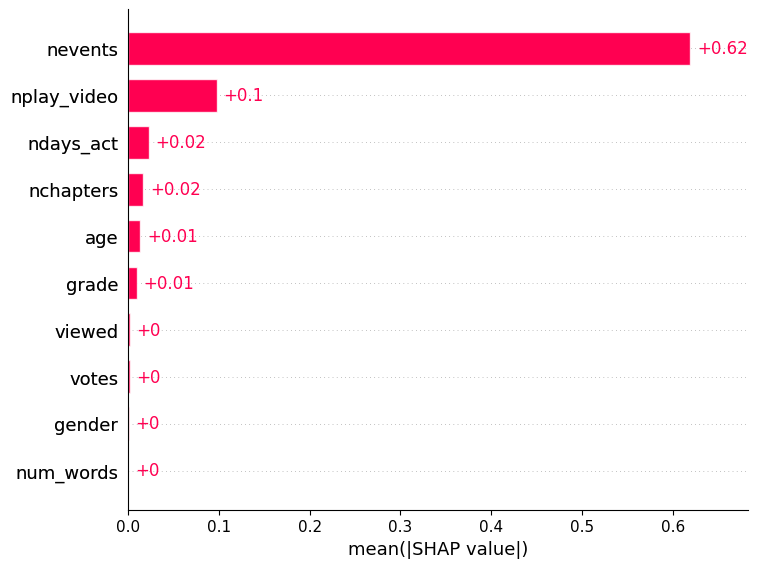

100%|██████████| 50/50 [00:05<00:00,  9.23it/s]


In [30]:
perm_vals = permutation(X_complete)
pos = perm_vals[..., 1]
shap.plots.bar(pos, max_display=1000)
plt.clf()

results = mlp.predict(X_complete)
target = 1 # 0 = Not Completed, 1 = Completed

plt.clf()
for i in tqdm.tqdm(range(0, len(results))):
    if results[i] == target: # Hits
        shap.plots.waterfall(pos[i], show=False)
        # plt.savefig(f"{path}/Shapley/Multi-Layer Perceptron/True Positive/TP_{i}.png", bbox_inches='tight')
        plt.clf()
    elif results[i] != target: # Misses
        shap.plots.waterfall(pos[i], show=False)
        # plt.savefig(f"{path}/Shapley/Multi-Layer Perceptron/False Negative/FN_{i}.png", bbox_inches='tight')
        plt.clf()